# Assignment Play
# SVM and Logistic Regression

## Importing the libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


## Importing the dataset

In [68]:
dataset = pd.read_csv('credit_card_defaults.csv')
X_original = dataset.iloc[1:, 1:-1].values
y_orignal = dataset.iloc[1:, -1].values

X = dataset.iloc[1:, 1:-1].values
y = dataset.iloc[1:, -1].values
y = y.reshape(len(y),1)
print(X[0])
print(X_original[0])
X.shape

['20000' '2' '2' '1' '24' '2' '2' '-1' '-1' '-2' '-2' '3913' '3102' '689'
 '0' '0' '0' '0' '689' '0' '0' '0' '0']
['20000' '2' '2' '1' '24' '2' '2' '-1' '-1' '-2' '-2' '3913' '3102' '689'
 '0' '0' '0' '0' '689' '0' '0' '0' '0']


(30000, 23)

In [35]:
print(y)
print(y.shape)
X.shape

['1' '1' '0' ... '1' '1' '1']
(30000,)


(30000, 23)

In [3]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y),1)
print(X.shape)
y.shape
print(X.tolist())

(30000, 23)
[['20000', '2', '2', '1', '24', '2', '2', '-1', '-1', '-2', '-2', '3913', '3102', '689', '0', '0', '0', '0', '689', '0', '0', '0', '0'], ['120000', '2', '2', '2', '26', '-1', '2', '0', '0', '0', '2', '2682', '1725', '2682', '3272', '3455', '3261', '0', '1000', '1000', '1000', '0', '2000'], ['90000', '2', '2', '2', '34', '0', '0', '0', '0', '0', '0', '29239', '14027', '13559', '14331', '14948', '15549', '1518', '1500', '1000', '1000', '1000', '5000'], ['50000', '2', '2', '1', '37', '0', '0', '0', '0', '0', '0', '46990', '48233', '49291', '28314', '28959', '29547', '2000', '2019', '1200', '1100', '1069', '1000'], ['50000', '1', '2', '1', '57', '-1', '0', '-1', '0', '0', '0', '8617', '5670', '35835', '20940', '19146', '19131', '2000', '36681', '10000', '9000', '689', '679'], ['50000', '1', '1', '2', '37', '0', '0', '0', '0', '0', '0', '64400', '57069', '57608', '19394', '19619', '20024', '2500', '1815', '657', '1000', '1000', '800'], ['500000', '1', '1', '2', '29', '0', '0', '

In [62]:
print(y)

[['1']
 ['1']
 ['0']
 ...
 ['1']
 ['1']
 ['1']]


## Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
print(f'Before scaling X {X[0]}')
X = sc_X.fit_transform(X)
print(f'After scaling X {X[0]}')
y = sc_y.fit_transform(y)

print(X[0])
print(X_original[0])

Before scaling X ['20000' '2' '2' '1' '24' '2' '2' '-1' '-1' '-2' '-2' '3913' '3102' '689'
 '0' '0' '0' '0' '689' '0' '0' '0' '0']
After scaling X [-1.13672015  0.81016074  0.18582826 -1.05729503 -1.24601985  1.79456386
  1.78234817 -0.69666346 -0.66659873 -1.53004603 -1.48604076 -0.64250107
 -0.64739923 -0.66799331 -0.67249727 -0.66305853 -0.65272422 -0.34194162
 -0.22708564 -0.29680127 -0.30806256 -0.31413612 -0.29338206]
[-1.13672015  0.81016074  0.18582826 -1.05729503 -1.24601985  1.79456386
  1.78234817 -0.69666346 -0.66659873 -1.53004603 -1.48604076 -0.64250107
 -0.64739923 -0.66799331 -0.67249727 -0.66305853 -0.65272422 -0.34194162
 -0.22708564 -0.29680127 -0.30806256 -0.31413612 -0.29338206]
['20000' '2' '2' '1' '24' '2' '2' '-1' '-1' '-2' '-2' '3913' '3102' '689'
 '0' '0' '0' '0' '689' '0' '0' '0' '0']


In [58]:
print(X)
print(sc_X)

[[-1.13672015  0.81016074  0.18582826 ... -0.30806256 -0.31413612
  -0.29338206]
 [-0.3659805   0.81016074  0.18582826 ... -0.24422965 -0.31413612
  -0.18087821]
 [-0.59720239  0.81016074  0.18582826 ... -0.24422965 -0.24868274
  -0.01212243]
 ...
 [-1.05964618 -1.23432296  0.18582826 ... -0.03996431 -0.18322937
  -0.11900109]
 [-0.67427636 -1.23432296  1.45111372 ... -0.18512036  3.15253642
  -0.19190359]
 [-0.90549825 -1.23432296  0.18582826 ... -0.24422965 -0.24868274
  -0.23713013]]
StandardScaler()


In [67]:
X_original_unscaled2 = sc_X.inverse_transform(X)
y_original_unscaled2 = sc_y.inverse_transform(y)

print(X_original[0])
print(X_original_unscaled2[0])
print(X[0])

['20000' '2' '2' '1' '24' '2' '2' '-1' '-1' '-2' '-2' '3913' '3102' '689'
 '0' '0' '0' '0' '689' '0' '0' '0' '0']
[ 2.000e+04  2.000e+00  2.000e+00  1.000e+00  2.400e+01  2.000e+00
  2.000e+00 -1.000e+00 -1.000e+00 -2.000e+00 -2.000e+00  3.913e+03
  3.102e+03  6.890e+02  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  6.890e+02  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
[-1.13672015  0.81016074  0.18582826 -1.05729503 -1.24601985  1.79456386
  1.78234817 -0.69666346 -0.66659873 -1.53004603 -1.48604076 -0.64250107
 -0.64739923 -0.66799331 -0.67249727 -0.66305853 -0.65272422 -0.34194162
 -0.22708564 -0.29680127 -0.30806256 -0.31413612 -0.29338206]


## Training the SVR model on the whole dataset

In [70]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
y.shape
regressor.fit(X, y.squeeze())

SVR()

In [45]:
X_original_unscaled = sc_X.inverse_transform(X)
y_original_unscaled = sc_y.inverse_transform(y)

## Predicting a new result

In [ ]:

print(sc_X.transform([[6.5]]))
print(regressor.predict(sc_X.transform([[6.5]])))
print(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))
print(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)))
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

[[6.5]]
[0.01158103]
[[0.01158103]]
[[252789.13921624]]


array([[252789.13921624]])

(30000, 23)
(30000, 1)
(30000,)
(30000, 1)


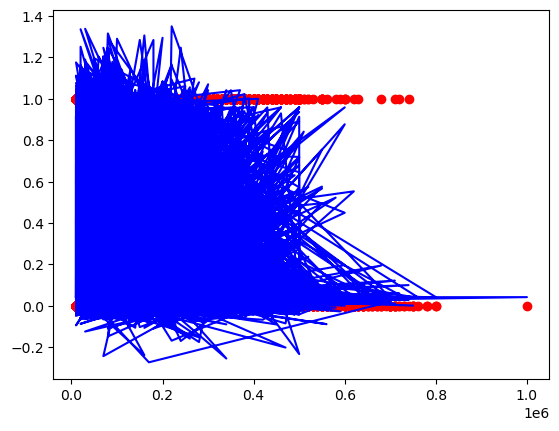

In [87]:
X_original_unscaled = sc_X.inverse_transform(X)
y_original_unscaled = sc_y.inverse_transform(y)
print(X_original_unscaled.shape)
print(y_original_unscaled.shape)
print(X_original_unscaled[:,0].shape)
print(X_original_unscaled[:,0].reshape(len(X_original_unscaled[:,0]),1).shape)
XAxis = X_original_unscaled[:,0].reshape(len(X_original_unscaled[:,0]),1)
plt.scatter(XAxis, y_original_unscaled, color = 'red')
plt.plot(XAxis, sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue') # X is already scalled at this point so you can pass in to predict



## Visualising the SVR results

ValueError: x and y must be the same size

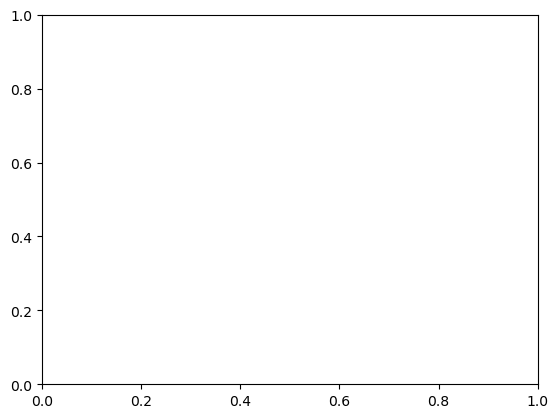

In [ ]:
X_original_unscaled = sc_X.inverse_transform(X)
y_original_unscaled = sc_y.inverse_transform(y)
plt.scatter(X_original_unscaled[:,0].reshape(len(X_original_unscaled[:,0]),1), y_original_unscaled, color = 'red')
plt.plot(X_original_unscaled, sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue') # X is already scalled at this point so you can pass in to predict
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

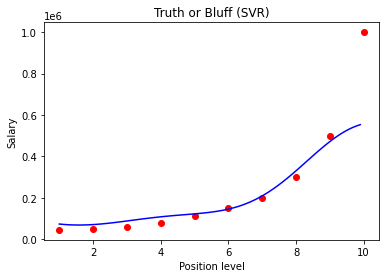

In [13]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()